In [1]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.feature_selection import SelectKBest, chi2
import os
import re
import pandas as pd
import nltk
from nltk.stem import ISRIStemmer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import arabicstopwords.arabicstopwords as stp
from sklearn.feature_selection import SelectKBest,  mutual_info_classif
import arff
import numpy as np




In [2]:

# the path to the dataset
root_dir = "DS"

# List of classes 
classes_all = ['culture', 'economy', 'local', 'international', 'religion', 'sports']

# Empty lists to store documents and labels
documents = []
labels = []

# Dictionary to store classes frequencies
classes_counts = {}

for classes in classes_all:
    folder_path = os.path.join(root_dir, classes)
    files = os.listdir(folder_path)
    # Count the number of files
    num_files = len([f for f in files if f.endswith('.txt')])  # Adjust the condition if needed
    classes_counts[classes] = num_files 
    
    # Loop through each folder and load the text files
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            text = text.split(sep ='\n')
            documents.append(text)
            labels.append(classes)  # Label the text based on the folder name


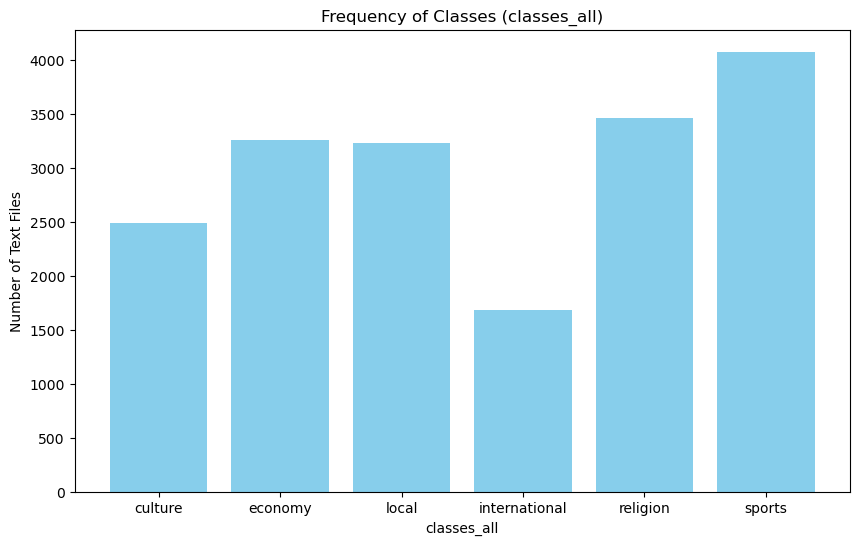

In [3]:
# Plot the classes frequencies
classes_all = list(classes_counts.keys())
counts = list(classes_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(classes_all, counts, color='skyblue')
plt.xlabel('classes_all')
plt.ylabel('Number of Text Files')
plt.title('Frequency of Classes (classes_all)')
plt.show()

In [4]:
# Count number of words in each document
numberOfWords = 0
for sentence in documents:
    numberOfWords += len(sentence)
print(numberOfWords)

9403805


**Remove stop words functions**
* use 3 different resources to delete stop words as possible

In [3]:
#import arabic stop words from nlkt which contain 706 words
nltk.download("stopwords")
arb_stopwords = set(nltk.corpus.stopwords.words("arabic"))
arb_stopwords = ' '.join(arb_stopwords)
# Apply normalizing to the stopwords list because it do not contain many words
arb_stopwords = re.sub(r'[إأٱآا]', 'ا', arb_stopwords)
arb_stopwords = re.sub(r'ى', 'ي', arb_stopwords)
arb_stopwords = re.sub(r'ؤ', 'و', arb_stopwords)
arb_stopwords = re.sub(r'ئ', 'ي', arb_stopwords)
arb_stopwords = re.sub(r'[a-zA-Z]', '', arb_stopwords)
arb_stopwords = arb_stopwords.split()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FaiOn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Function to remove stop words by import stop words library which contain 13465 words
def remove_stopWords(sentence):
    terms=[]
    stopWords= set(stp.stopwords_list())
    for term in sentence.split() :
        if term not in stopWords :
            terms.append(term)
    return " ".join(terms)

In [5]:
# Another arabic stop words from local text file which contain 769 words
ar_stop_list = open("D:\\L9\\NLP\\assignment\\ArabicStop.txt", encoding="utf-8")
stop_words = ar_stop_list.read().split('\n')
stop_words = ' '.join(stop_words)
# Apply normalizing to the stopwords list because it do not contain many words
stop_words = re.sub(r'[إأٱآا]', 'ا', stop_words)
stop_words = re.sub(r'ى', 'ي', stop_words)
stop_words = re.sub(r'ؤ', 'و', stop_words)
stop_words = re.sub(r'ئ', 'ي', stop_words)
stop_words = re.sub(r'[a-zA-Z]', '', stop_words)
stop_words = stop_words.split()


**Stemming method**

In [6]:
def stemm(text):
  # Tokenize the text into tokens
  text=word_tokenize(text)
  #stemming of each word
  stem=ISRIStemmer()
  text=[stem.stem(i) for i in text]
  return ' '.join(text)



In [7]:

#store the processed documents
training_corpus = []

for sentence in documents: 
    text = ' '.join(sentence)
    text = remove_stopWords(text)                       # remove stop words
    text = text.split()                                           # Split the cleaned text back into tokens
    text = [w for w in text if not w in arb_stopwords]   # remove stop words 
    text = [w for w in text if not w in stop_words]   # remove stop words
    text = ' '.join(text)
    text = re.sub(r'\W|\d', ' ', text)                            # Remove punctuation and digits
    text = re.sub(r'[إأٱآا]', 'ا', text)                          # Normalize the Arabic text
    text = re.sub(r'ة', 'ه', text)
    text = re.sub(r'وو', 'و',text)
    text = re.sub(r'يي', 'ي',text)
    text = re.sub(r'ييي', 'ي',text)
    text = re.sub(r'اا', 'ا',text)
    text = re.sub(r'ى', 'ي', text)
    text = re.sub(r'ؤ', 'ء', text)
    text = re.sub(r'ئ', 'ء', text)
    text = re.sub(r'[a-zA-Z]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = stemm(text)
    text = remove_stopWords(text)                               # remove stop words again
    text = text.split()                                           # Split the cleaned text back into tokens
    meaningful_words = [w for w in text if not w in arb_stopwords]   # remove stop words 
    meaningful_words = [w for w in meaningful_words if not w in stop_words]   # remove stop words 
    training_corpus.append(meaningful_words)                      # add the list of meaningful words to the training corpus


In [10]:
print(training_corpus[0])

['كتب', 'سلم', 'رحب', 'طلق', 'دور', 'رمج', 'جدد', 'يفز', 'ذعه', 'رنمج', 'شبب', 'سمر', 'طول', 'ايو', 'ونو', 'حمل', 'طيت', 'رمج', 'جدد', 'فقر', 'شيق', 'نسب', 'ذوق', 'شهد', 'سمع', 'حد', 'سوء', 'دور', 'رمج', 'حلي', 'رعي', 'سءل', 'وزر', 'تنع', 'جدد', 'رمج', 'ضفه', 'رعا', 'اوق', 'شهد', 'سمع', 'فءت', 'سبق', 'خرط', 'يفز', 'هجي', 'نوع', 'نقا', 'رمج', 'عدل', 'شكل', 'سهر', 'تغر', 'جدل', 'رمج', 'ثءق', 'شمل', 'تنع', 'ثقف', 'ركز', 'طرح', 'رمج', 'حله', 'جدد', 'دره', 'يفز', 'لقء', 'صحف', 'عقد', 'ظهر', 'كتب', 'دير', 'يفز', 'هندس', 'عبدالل', 'عبر', 'صلح', 'حفظ', 'قسم', 'دير', 'رمج', 'عمه', 'يفز', 'وزي', 'رشد', 'سقه', 'كبه', 'يفز', 'دره', 'سعت', 'جهد', 'خرج', 'بدر', 'تمز', 'تمش', 'رغب', 'شهد', 'درج', 'ركز', 'صحه', 'بقي', 'قنو', 'فضء', 'شير', 'دره', 'يفز', 'صبح', 'خار', 'رمج', 'ترد', 'طرح', 'دور', 'رمج', 'فرض', 'رمج', 'رضء', 'شهد', 'خرج', 'صور', 'لءق', 'لقء', 'خرط', 'رمج', 'حلي', 'عصر', 'جهد', 'عمل', 'حقل', 'يفز', 'يسع', 'جال', 'ذكر', 'تقل', 'بصم', 'عمل', 'بصم', 'اخر', 'معد', 'قدم', 'خرج', 'شير', 'كتف', '

In [10]:
# Number of words in training corpus (it decreased to the half)
numberOfWords = 0
for sentence in training_corpus:
    numberOfWords += len(sentence)
print(numberOfWords)


5427369


In [12]:
# Number of documents
print(len(documents))

18198




---


 **Vectorization (TF-IDF)**

In [9]:
# Vectorization using TF-IDF
# max_df=0.8, it will ignore words that appear in more than 70% of documents.
# min_df=5, ignore terms that appear in fewer than 5 documents.
# max_features=5000 because it is very large corpusto and to avoid computationally expensive
# default ngram_range=(1, 1) but use ngram_range=(1, 2)  Using unigrams and bigrams to capture more meaning.
tfidf_vectorizer = TfidfVectorizer(max_df=0.8 , min_df=5, max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf_vectorizer.fit_transform([' '.join(words) for words in training_corpus])

# display the document-term matrix
vocab = tfidf_vectorizer.get_feature_names_out()
docterm = pd.DataFrame(X_tfidf.todense(), columns=vocab)


docterm

,ءات,ءتم,ءثر,ءجر,ءجل,ءخذ,ءخر,ءده,ءرج,ءرخ,...,ينم,ينه,يهد,يهد نصر,يهم,يوج,يوح,يوص,يول,يون
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.02298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.056404,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18193,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
18194,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
18195,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
18196,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [12]:
import pickle
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

**Add hand-crafted features**

In [10]:
# Add hand-crafted features 
doc_lengths = [len(words) for words in training_corpus]  # Document length (number of words)
unique_words_ratios = [len(set(words)) / len(words) if len(words) > 0 else 0 for words in training_corpus]  # Unique words ratio

# Create a DataFrame to hold the hand-crafted features
handcrafted_features_df = pd.DataFrame({
    'doc_length': doc_lengths,
    'unique_words_ratio': unique_words_ratios
})

# Combine the TF-IDF matrix with the hand-crafted features
docterm_handcrafted = pd.concat([docterm.reset_index(drop=True), handcrafted_features_df], axis=1)
docterm_handcrafted

,ءات,ءتم,ءثر,ءجر,ءجل,ءخذ,ءخر,ءده,ءرج,ءرخ,...,يهد,يهد نصر,يهم,يوج,يوح,يوص,يول,يون,doc_length,unique_words_ratio
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1589,0.345500
1,0.0,0.0,0.02298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,510,0.527451
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,389,0.524422
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1200,0.484167
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.056404,0.0,0.0,0.0,0.0,0.000000,219,0.634703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18193,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,143,0.713287
18194,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,113,0.610619
18195,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,171,0.567251
18196,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,138,0.688406


**Applying feature selection to select top 100 features**

In [11]:
# Apply SelectKBest to select top 100 features
X_combined = docterm_handcrafted  
y = [label for label in labels]  # List of the labels
class_mapping = {
    'culture': 0,
    'economy': 1,
    'local': 2,
    'international': 3,
    'religion': 4,
    'sports': 5
}
# Convert the list of classes to numbers using the mapping
y_numeric = [class_mapping[classes] for classes in y]

# Select top 100 features using mutual_info_classif
selector = SelectKBest(score_func=mutual_info_classif, k=100)
X_selected = selector.fit_transform(X_combined, y_numeric)

# Get the selected feature names and display the final features
selected_feature_names = X_combined.columns[selector.get_support()]
selected_features_df = pd.DataFrame(X_selected, columns=selected_feature_names)
selected_features_df


,اخر,الل,الل سلم,الل صلي,امر,انس,برا,بطل,بلغ,تبع,...,نظر,هدف,وجه,وحد,وزر,وصل,وضع,وقع,doc_length,unique_words_ratio
0,0.018251,0.004399,0.0,0.0,0.007339,0.005204,0.000000,0.000000,0.0,0.025679,...,0.000000,0.000000,0.008488,0.004229,0.022179,0.024269,0.016243,0.000000,1589.0,0.345500
1,0.009549,0.000000,0.0,0.0,0.011519,0.032673,0.000000,0.000000,0.0,0.013435,...,0.000000,0.000000,0.026643,0.000000,0.139242,0.012697,0.000000,0.101686,510.0,0.527451
2,0.044210,0.015984,0.0,0.0,0.000000,0.037818,0.000000,0.036501,0.0,0.000000,...,0.000000,0.014599,0.000000,0.015366,0.000000,0.073484,0.044264,0.000000,389.0,0.524422
3,0.070187,0.000000,0.0,0.0,0.019540,0.027710,0.000000,0.000000,0.0,0.022789,...,0.065400,0.000000,0.015065,0.022518,0.007873,0.050254,0.050451,0.064682,1200.0,0.484167
4,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.026659,0.000000,0.000000,0.027538,0.000000,0.000000,0.026442,0.000000,219.0,0.634703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18193,0.027797,0.000000,0.0,0.0,0.000000,0.000000,0.107926,0.000000,0.0,0.000000,...,0.074825,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.0,0.713287
18194,0.079278,0.000000,0.0,0.0,0.031880,0.000000,0.051302,0.000000,0.0,0.000000,...,0.035567,0.279249,0.036867,0.073479,0.000000,0.000000,0.000000,0.000000,113.0,0.610619
18195,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.086489,0.000000,0.0,0.000000,...,0.029981,0.382509,0.000000,0.123877,0.000000,0.000000,0.000000,0.000000,171.0,0.567251
18196,0.056115,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.046329,0.0,0.000000,...,0.000000,0.037061,0.000000,0.039008,0.000000,0.000000,0.000000,0.000000,138.0,0.688406


In [22]:
import pickle
with open('tfidf_selector3.pkl', 'wb') as file:
    pickle.dump(selector, file)

**Save the DataFrame as a arff and csv file**

In [26]:
# Save the DataFrame as a CSV file
selected_features_df['label'] = y  # Add the target labels to the DataFrame
selected_features_df.to_csv('TFIDF.csv', index=False)

In [29]:
# Prepare data for ARFF format
arff_data = {
    'description': '',
    'relation': 'TFIDF',
    'attributes': [(col, 'NUMERIC') for col in selected_feature_names] + [('label', list(set(y)))],
    'data': np.hstack([X_selected, np.array(y).reshape(-1, 1)]).tolist()
}

# Save to ARFF file
with open('TFIDF.arff', 'w') as f:
    arff.dump(arff_data, f)
    
print("Test dataset has been saved as 'TFIDF_Test.arff'.")



-------------

**Test**
on randomly selected 64 file

In [32]:
# Load the test data
test_root_dir = "test"
test_documents = []
test_labels = []
for classes in classes_all:
    test_folder_path = os.path.join(test_root_dir, classes)  
    for filename in os.listdir(test_folder_path):
        file_path = os.path.join(test_folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            text = text.split(sep='\n')
            test_documents.append(text)
            test_labels.append(classes)  # Label the text based on the folder name


In [31]:

# Preprocess the test data (same as the training data)
test_corpus = []
for sentence in test_documents: 
    text = ' '.join(sentence)
    text = remove_stopWords(text)                           # remove stop words
    text = text.split()                                           # Split the cleaned text back into tokens
    text = [w for w in text if not w in arb_stopwords]   # remove stop words 
    text = [w for w in text if not w in stop_words]   # remove stop words 
    text = ' '.join(text)
    text = re.sub(r'\W|\d', ' ', text)                            # Remove punctuation and digits
    text = re.sub(r'[إأٱآا]', 'ا', text)                          # Normalize the Arabic text
    text = re.sub(r'ة', 'ه', text)
    text = re.sub(r'وو', 'و',text)
    text = re.sub(r'يي', 'ي',text)
    text = re.sub(r'ييي', 'ي',text)
    text = re.sub(r'اا', 'ا',text)
    text = re.sub(r'ى', 'ي', text)
    text = re.sub(r'ؤ', 'ء', text)
    text = re.sub(r'ئ', 'ء', text)
    text = re.sub(r'[a-zA-Z]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = stemm(text)
    text = remove_stopWords(text)                                       # remove stop words again
    text = text.split()                                           # Split the cleaned text back into tokens
    meaningful_words = [w for w in text if not w in arb_stopwords]   # remove stop words using the 'arabicStop' stopword list
    meaningful_words = [w for w in meaningful_words if not w in stop_words]   # remove stop words using the 'arabicStop' stopword list
    test_corpus.append(meaningful_words)  


In [34]:
# Transform the test data using the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform([' '.join(words) for words in test_corpus])


In [35]:
# Create handcrafted features for the test data (same as the training data)
test_doc_lengths = [len(words) for words in test_corpus]
test_unique_words_ratios = [len(set(words)) / len(words) if len(words) > 0 else 0 for words in test_corpus]

test_handcrafted_features_df = pd.DataFrame({
    'doc_length': test_doc_lengths,
    'unique_words_ratio': test_unique_words_ratios
})

# Combine the TF-IDF matrix with the handcrafted features for the test data
test_docterm_handcrafted = pd.concat([pd.DataFrame(X_test_tfidf.todense(), columns=vocab).reset_index(drop=True), test_handcrafted_features_df], axis=1)
test_docterm_handcrafted

,ءات,ءتم,ءثر,ءجر,ءجل,ءخذ,ءخر,ءده,ءرج,ءرخ,...,يهد,يهد نصر,يهم,يوج,يوح,يوص,يول,يون,doc_length,unique_words_ratio
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,365,0.627397
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,182,0.631868
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86,0.720930
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,158,0.367089
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,375,0.602667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,182,0.681319
60,0.0,0.0,0.056385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187,0.668449
61,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,359,0.579387
62,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62,0.854839


In [36]:
# Apply the same feature selection on the test data 
X_test_selected = selector.transform(test_docterm_handcrafted)


In [37]:
# Get the selected feature names and display the final features
test_selected_feature_names = test_docterm_handcrafted.columns[selector.get_support()]



In [40]:
# Prepare the ARFF data structure
test_arff_data = {
    'description': '',
    'relation': 'TFIDF_Test',
    'attributes': [(col, 'NUMERIC') for col in test_selected_feature_names] + [('label', ['culture', 'economy', 'local', 'international', 'religion', 'sports'])],  # Declare class labels as nominal values
    'data': np.hstack([X_test_selected, np.array(test_labels).reshape(-1, 1)]).tolist()  # Use original string labels here
}

# Save the test data in ARFF format
with open('TFIDF_Test.arff', 'w') as f:
    arff.dump(test_arff_data, f)

print("Test dataset has been saved as 'TFIDF_Test.arff'.")


Test dataset has been saved as 'TFIDF_Test.arff'.
